<a href="https://colab.research.google.com/github/marcelomj23/proprio/blob/main/Tech_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge Fase 2 - Machine Learning**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as datetime
from prophet import Prophet
from scipy.stats import normaltest

## **Dados**

In [7]:
#Carregando os Dados e tratando as informações
path_ibovespa = '/content/dados_ibovespa.csv'
df_ibv = pd.read_csv(path_ibovespa,parse_dates=['Data'], dayfirst=True, thousands='.', decimal=',')
df_ibv.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2022-12-29,109735,110237,111178,109560,"13,39M","-0,46%"
1,2022-12-28,110237,108578,110536,108578,"11,19M","1,53%"
2,2022-12-27,108578,108739,109353,107418,"11,16M","-0,15%"
3,2022-12-26,108738,109699,109755,108309,"5,22M","-0,87%"
4,2022-12-23,109698,107552,109994,107552,"12,85M","2,00%"


In [8]:
df_ibv.dtypes

Data        datetime64[ns]
Último               int64
Abertura             int64
Máxima               int64
Mínima               int64
Vol.                object
Var%                object
dtype: object

In [9]:
# Função para transformar a coluna `Vol.` de texto para números inteiros
def parse_vol(x):
  # Não faz nada caso não seja uma string
  if type(x) != str:
    return None

  # Multiplica por 1 milhão se possuí símbolo M ou por 1 mil se símbolo K
  multiplier = 1_000_000 if x.endswith('M') else 1_000

  # Remove o símbolo M ou K
  result = x[:-1]

  # Altera o separador para . ao invés de ,
  result = result.replace(',', '.')

  # Transforma a string em número
  result = float(result)

  # Multiplica o número pelo multiplicador e transforma em inteiro
  return int(result * multiplier)

In [10]:
# Função para transformar a coluna `Var%` de texto para número decimal
def parse_var(x):
  # Remove o símbolo de %
  result = x[:-1]

  # Altera o separador para . ao invés de ,
  result = result.replace(',', '.')

  # Transforma a string em número
  result = float(result)

  # Transforma em porcentagem
  return result / 100

In [11]:
# Cria um novo DataFrame
df_ibv2 = df_ibv.copy()
df_ibv2['Vol.'] = df_ibv2['Vol.'].apply(parse_vol)
df_ibv2['Var%'] = df_ibv2['Var%'].apply(parse_var)
df_ibv2 = df_ibv2.set_index('Data', drop=True)
df_ibv2.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2022-12-29,109735,110237,111178,109560,13390000.0,-0.0046
2022-12-28,110237,108578,110536,108578,11190000.0,0.0153
2022-12-27,108578,108739,109353,107418,11160000.0,-0.0015
2022-12-26,108738,109699,109755,108309,5220000.0,-0.0087
2022-12-23,109698,107552,109994,107552,12850000.0,0.0200


In [12]:
df_ibv2.isnull().sum()

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [13]:
df_ibv2.loc[df_ibv2['Vol.'].isnull()]

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2016-02-10,40377,40592,40592,39960,NaN,-0.0053


In [14]:
df_ibv2 = df_ibv2.dropna()
df_ibv2.isnull().sum()

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

### **Gráficos - Análises**

In [15]:
df_ibv2.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,2467.000000,2467.000000,2467.000000,2467.000000,2.467000e+03,2467.000000
mean,78603.554114,78585.035266,79353.935955,77824.330361,6.100759e+06,0.000364
std,25835.935986,25830.192885,26023.799429,25621.088247,3.765220e+06,0.015903
min,37497.000000,37501.000000,38031.000000,37046.000000,4.243200e+05,-0.147800
25%,53957.500000,53963.000000,54356.500000,53448.000000,3.450000e+06,-0.008200
50%,74657.000000,74656.000000,75470.000000,74145.000000,4.460000e+06,0.000500
75%,103387.000000,103316.000000,104284.000000,102342.500000,8.350000e+06,0.009100
max,130776.000000,130776.000000,131190.000000,129526.000000,2.603000e+07,0.139100


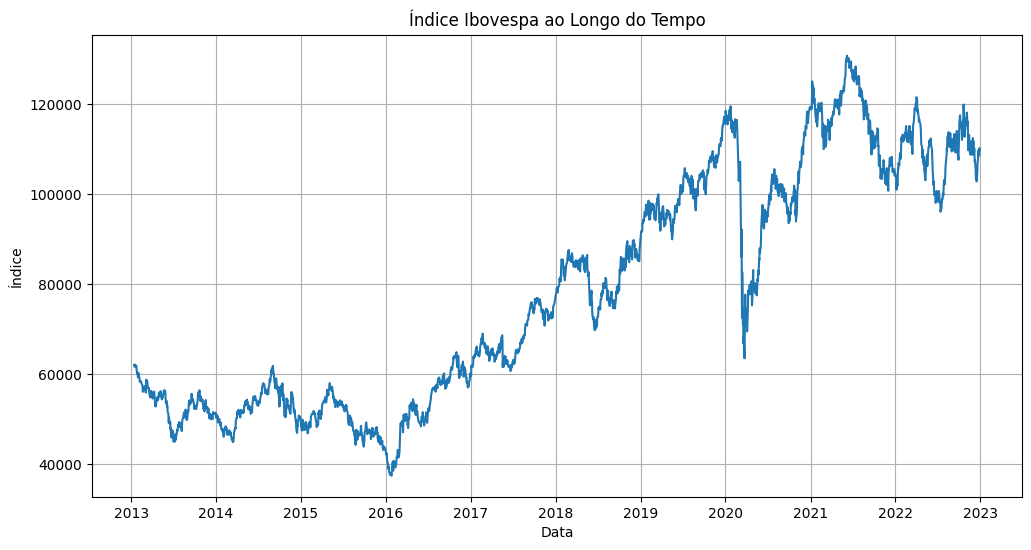

In [16]:
# Gráfico de linha para o Índice Ibovespa ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_ibv['Data'], df_ibv['Último'])
plt.title('Índice Ibovespa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Índice')
plt.grid(True)
plt.show()


In [17]:
condicoes = [(df_ibv2['Var%'] < 0),
             (df_ibv2['Var%'] > 0)]
opcoes = ["0","1"]
df_ibv2['Classificação'] = np.select(condicoes, opcoes)
df_ibv2

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Classificação
Data,,,,,,,
2022-12-29,109735,110237,111178,109560,13390000.0,-0.0046,0
2022-12-28,110237,108578,110536,108578,11190000.0,0.0153,1
2022-12-27,108578,108739,109353,107418,11160000.0,-0.0015,0
2022-12-26,108738,109699,109755,108309,5220000.0,-0.0087,0
2022-12-23,109698,107552,109994,107552,12850000.0,0.0200,1
...,...,...,...,...,...,...,...
2013-01-18,61956,62197,62395,61822,3500000.0,-0.0038,0
2013-01-17,62194,61806,62309,61683,3380000.0,0.0066,1
2013-01-16,61787,61726,61787,61241,2790000.0,0.0010,1


In [18]:
condicoes = [(df_ibv2['Var%'] < 0),
             (df_ibv2['Var%'] == 0),
             (df_ibv2['Var%'] > 0)]
opcoes = ["Baixa","Nulo","Alta"]
df_ibv2['Alta_Baixa'] = np.select(condicoes, opcoes)
df_ibv2

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Classificação,Alta_Baixa
Data,,,,,,,,
2022-12-29,109735,110237,111178,109560,13390000.0,-0.0046,0,Baixa
2022-12-28,110237,108578,110536,108578,11190000.0,0.0153,1,Alta
2022-12-27,108578,108739,109353,107418,11160000.0,-0.0015,0,Baixa
2022-12-26,108738,109699,109755,108309,5220000.0,-0.0087,0,Baixa
2022-12-23,109698,107552,109994,107552,12850000.0,0.0200,1,Alta
...,...,...,...,...,...,...,...,...
2013-01-18,61956,62197,62395,61822,3500000.0,-0.0038,0,Baixa
2013-01-17,62194,61806,62309,61683,3380000.0,0.0066,1,Alta
2013-01-16,61787,61726,61787,61241,2790000.0,0.0010,1,Alta


Text(0, 0.5, 'Fechamento')

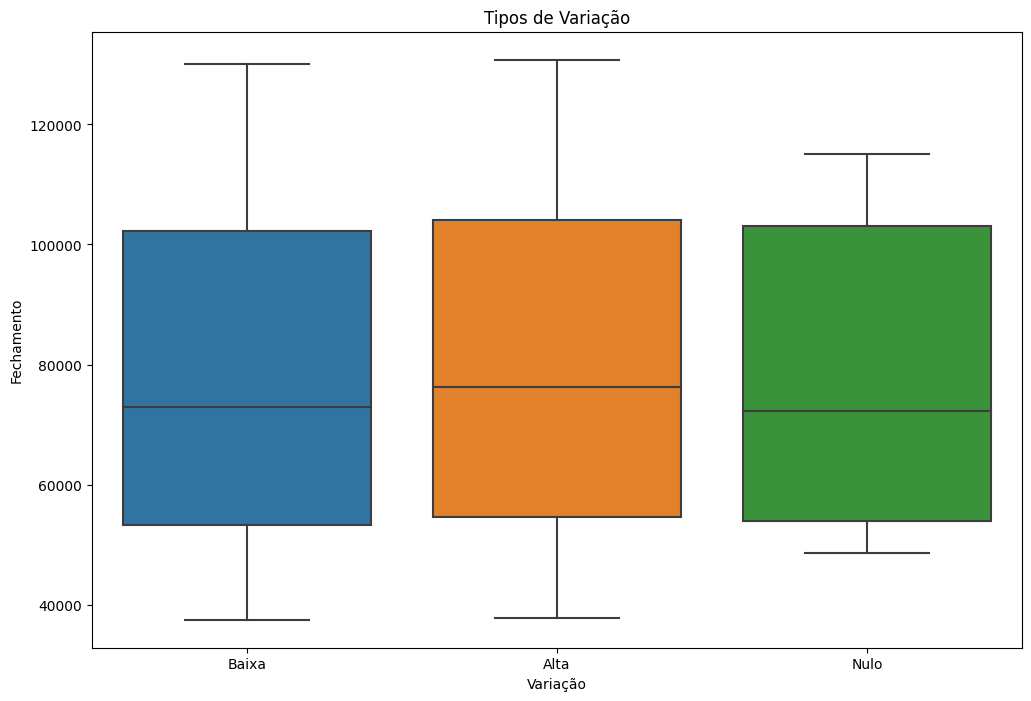

In [19]:
# Gráfico de Distribuição das Variações
fig, ax = plt.subplots(figsize = ( 12, 8 ))
plt.title("Tipos de Variação");
sns.boxplot(x = 'Alta_Baixa', y = 'Último', data = df_ibv2)
ax.set_xlabel( "Variação" , size = 10 )
ax.set_ylabel( "Fechamento" , size = 10 )



In [36]:
#Criando um DataFrame Prophet
df_ph = df_ibv2
df_ph = df_ph.drop(columns=["Abertura","Máxima", "Mínima", "Vol.", "Var%","Classificação","Alta_Baixa"])
df_ph


,Último
dt2,
2022-12-29,109735
2022-12-28,110237
2022-12-27,108578
2022-12-26,108738
2022-12-23,109698
...,...
2013-01-18,61956
2013-01-17,62194
2013-01-16,61787


In [37]:
# renomeando as colunas

df_ph.index.rename('dt2', inplace=True)
df_ph = df_ph.rename(columns={'Último': 'y'})
df_ph['dt2'] = df_ibv2.index
df_ph.head()

,y,dt2
dt2,,
2022-12-29,109735,2022-12-29
2022-12-28,110237,2022-12-28
2022-12-27,108578,2022-12-27
2022-12-26,108738,2022-12-26
2022-12-23,109698,2022-12-23


In [38]:
# instanciando o modelo
m = Prophet(yearly_seasonality=True)

# realizando o treinamento
m.fit(df_ph)

ValueError: ignored

In [39]:

# método auxiliar para previsão
future = m.make_future_dataframe(periods = 365)
# previsão do modelo
forecast = m.predict(future)

Exception: ignored

In [40]:
# definindo uma data de corte
data_fim = '2022-01-01'
# definindo os dados de treino, antes da data de corte
train = df_ph.loc[df_ph['dt2'] <= data_fim]
# definindo os dados de teste posterior a data de corte
test = df_ph.loc[df_ph['dt2'] > data_fim]

In [42]:
# contando a quantidade de dias à frente para posteriormente checarmos a acurácia da previsão
dias_a_prever = len(test.ds.unique())
# checando a quantidade de dias
dias_a_prever

AttributeError: ignored

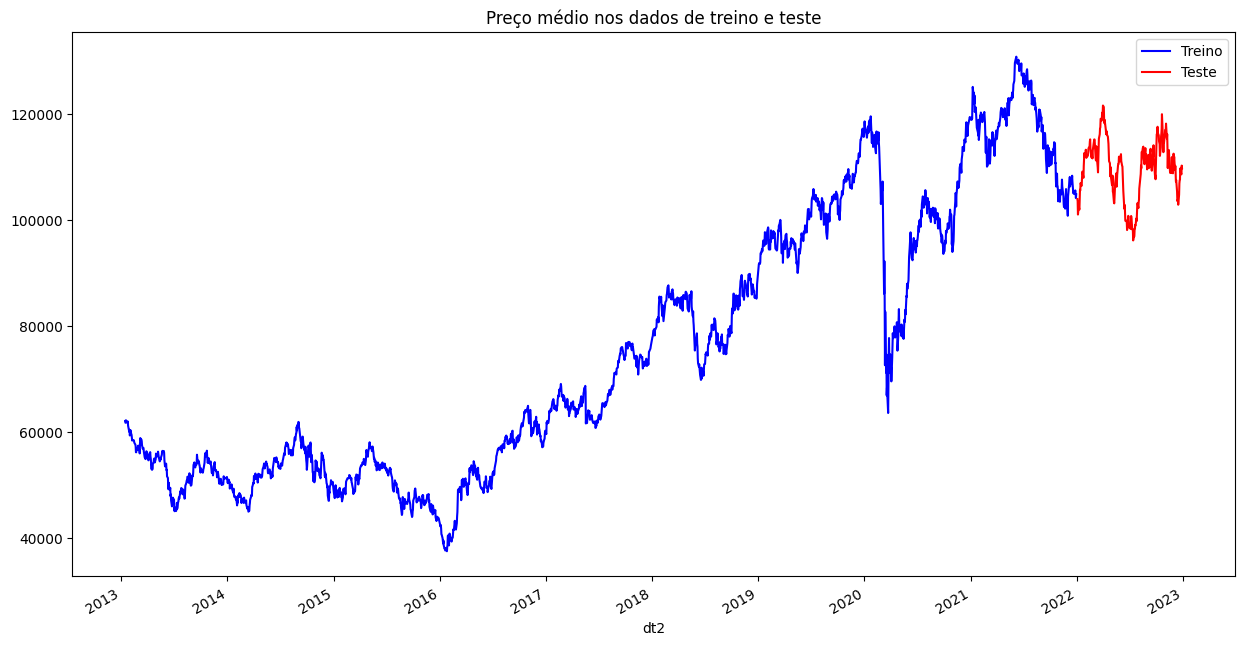

In [32]:

# definindo o tamanho do plot
f, ax = plt.subplots(figsize=(15,8))
train.plot(kind='line', x='dt2', y='y', color='Blue', label='Treino', ax=ax)
test.plot(kind='line', x='dt2', y='y', color='Red', label='Teste', ax=ax)
plt.title('Preço médio nos dados de treino e teste');

Text(0.5, 1.0, 'Teste vs Previsão')

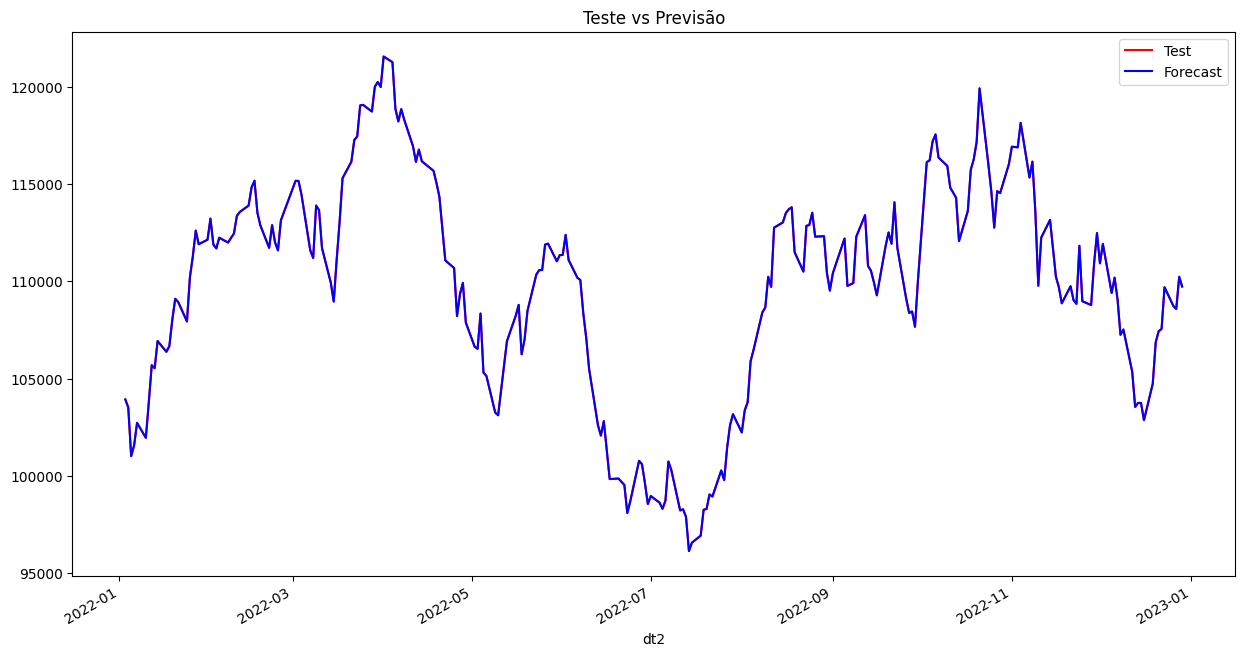

In [33]:
f, ax = plt.subplots(figsize=(15,8))
test.plot(kind='line',x='dt2', y='y', color='Red', label='Test', ax=ax)
test.plot(kind='line',x='dt2',y='y', color='Blue',label='Forecast', ax=ax)
plt.title('Teste vs Previsão')